로지스틱 회귀의 결정 경계 실습

In [31]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

임의의 데이터 생성

In [32]:
x = torch.randn(100,2)
y = ((x[:,0] > 0.5) & (x[:,1] > 0.04)).float()

# print(x,y)

모델 정의

In [35]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        fc  = F.sigmoid(out)
        print('fc >> ', fc)
        return fc
    
model =LogisticRegression(input_dim=2, output_dim=1)
print(model)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


모델 학습, 결정 경계 그리기

fc >>  tensor([[0.9145],
        [0.6571],
        [0.8623],
        [0.8812],
        [0.8563],
        [0.5513],
        [0.7527],
        [0.7531],
        [0.8474],
        [0.2315],
        [0.8016],
        [0.5395],
        [0.5131],
        [0.7408],
        [0.8540],
        [0.6758],
        [0.7561],
        [0.6118],
        [0.7290],
        [0.3148],
        [0.7344],
        [0.5707],
        [0.7293],
        [0.5529],
        [0.6303],
        [0.8896],
        [0.9681],
        [0.6163],
        [0.4046],
        [0.7805],
        [0.6314],
        [0.4864],
        [0.2735],
        [0.6648],
        [0.8209],
        [0.6406],
        [0.6780],
        [0.5068],
        [0.7446],
        [0.6736],
        [0.6261],
        [0.8645],
        [0.7739],
        [0.7085],
        [0.5360],
        [0.5059],
        [0.6029],
        [0.4765],
        [0.4427],
        [0.7688],
        [0.7533],
        [0.4138],
        [0.5935],
        [0.6704],
        [0.8118],
   

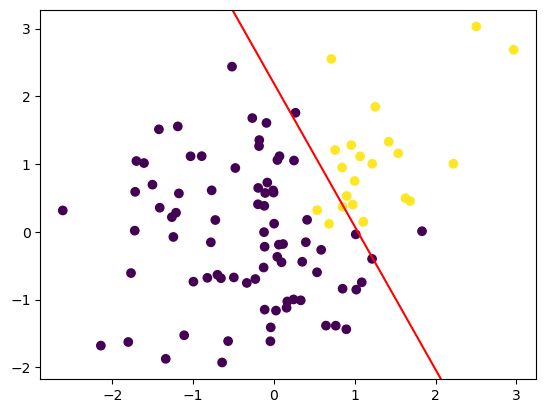

In [36]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(),y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# 결정경계 그리기
plt.scatter(x[:,0],x[:,1],c=y)
x_min,x_max = plt.xlim()    # x좌표 최소값 최대값
y_min,y_max = plt.ylim()    # y좌표 최소값 최대값

xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
#  np.meshgrid() -> x,y 좌표 기반으로 격자 포인트 생성
#  xx,yy -> 2차원 배열을 가짐

z = model(torch.tensor(np.c_[xx.ravel(),yy.ravel()],dtype = torch.float32)).detach().numpy()
# torch.tensor 변경하고 
# np.c[] -> xx,yy 연결
# ravel() -> 2차원 배열 -> 1차원 평면화 -> 변환된 입력, 모델 전달
# .detach().numpy() 예측값을 numpy 형태로 변환 -> z 저장

z = z.reshape(xx.shape)

plt.contour(xx,yy,z,levels=[0.5],colors='red')  # 경계선
# plt.contour() -> xx,yy 격자에 대응하는 결정경계 그리는 함수
plt.show()